In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.data.shape

(70000, 784)

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

In [3]:
data,target = fetch_openml('mnist_784', version=1, cache=True, return_X_y = True)
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
data.shape

(70000, 784)

In [5]:
target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
target.shape

(70000,)

In [7]:
data[0].reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

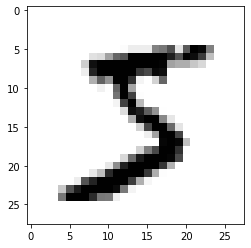

In [8]:
plt.imshow(data[0].reshape(28,28), cmap='gray_r')

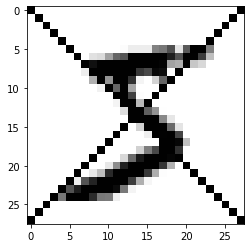

In [9]:
def add_X(data):
    data = data.reshape(28,28)
    for i in range(28):
        for j in range(28):
            if i-j == 0 or i+j == 27:
                data[i,j] = 253.
    data = data.reshape(784,1)
    return data

plt.imshow(add_X(data[0]).reshape(28,28), cmap='gray_r')

In [11]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(data[:1000],target[:1000],random_state=0)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       1.00      0.91      0.96        35
           2       0.86      0.90      0.88        20
           3       0.86      0.83      0.84        23
           4       0.88      0.92      0.90        25
           5       0.79      0.85      0.81        26
           6       0.91      0.87      0.89        23
           7       0.94      0.85      0.89        34
           8       0.78      0.95      0.86        19
           9       0.74      0.89      0.81        19

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.89      0.88      0.88       250



Text(91.68, 0.5, 'predicted label')

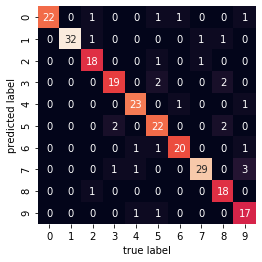

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')